# * Kurapati Venkatesh

# * 09012021

# * Topic: Simple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A certain food based company conducted a survey with the help of a fitness company spread across the country to find relationship between a person’s weight gain and the no of calories consumed by them in order to come up a diet plan for individuals that fall under different weight groups. Approach - A Simple Linear regression model needs to be built with target variable ‘Calories.Consumed’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models. 

## -----------------------------------------------------------------------------------

### Problem Objective:
##### A Simple Linear regression model needs to be built with target variable ‘Calories.Consumed’

## -------------------------------------------------------------------------------------------

## Import libraries:

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## import dataset:

In [59]:
wg_cc=pd.read_csv(r"G:\360digit\assignments meterial\SLR\calories_consumed.csv")

## Data Exploration:

In [60]:
wg_cc

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [61]:
wg_cc=wg_cc.rename(columns={'Weight gained (grams)': 'wg','Calories Consumed': 'cc' })

In [62]:
wg_cc

,wg,cc
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [63]:
wg_cc.corr()

,wg,cc
wg,1.000000,0.946991
cc,0.946991,1.000000


Text(0, 0.5, 'Weight gained (grams)')

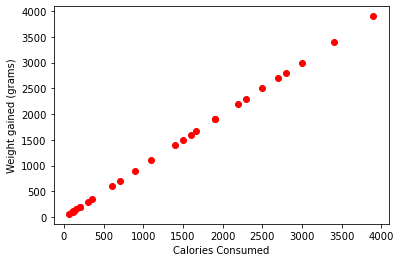

In [64]:
plt.scatter(x=wg_cc, y=wg_cc, color='red')
plt.xlabel("Calories Consumed")
plt.ylabel("Weight gained (grams)")

In [65]:
wg_cc.describe(include="all")

,wg,cc
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


### Importing statsmodels.formula.api for linear regression model:

In [66]:
import statsmodels.formula.api as smf

In [67]:
model=smf.ols("cc~wg",data=wg_cc).fit()

In [68]:
model.params

Intercept    1577.200702
wg              2.134423
dtype: float64

In [69]:
model.summary()

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.86e-07
Time:                        20:32:30   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1577.2007    100.541     15.687      0.000    1358.141    1796.260
wg             2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The statistics we are mainly concerned with to determine whether the model is viable or not are:
* The coefficients and its p-value(significance)
* R-squared value
* F-statistic and its significance

### Inferences from model:

1. The coefficient for wg is 2.1344, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.897, which means that 89.7% of the calories variance can be explained by the weight column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is not a statistically significant.

In [70]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,1358.141455,1796.259949
wg,1.678994,2.589852


In [71]:
pred = model.predict(wg_cc) # Predicted values of wg using the model

In [72]:
sqrt(mean_squared_error(wg_cc.cc, pred))

232.83350070960887

### Visualization of regression line over the scatter plot of wg & cc:

Text(0.5, 0, 'Weight gained (grams)')

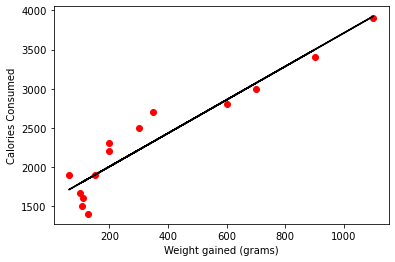

In [73]:
plt.scatter(x=wg_cc.wg, y=wg_cc.cc, color='red')
plt.plot(wg_cc.wg, pred,color='black')
plt.ylabel("Calories Consumed")
plt.xlabel("Weight gained (grams)")

In [74]:
pred.corr(wg_cc.cc)

0.9469910088554458

### Transforming variables for accuracy:

In [32]:
model1 = smf.ols('cc~np.log(wg)',data=wg_cc).fit()

In [33]:
model1.params

Intercept    -1911.124394
np.log(wg)     774.173550
dtype: float64

In [34]:
model1.summary()

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cc   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           8.02e-07
Time:                        20:14:13   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(wg)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inferences from model1:

1. The coefficient for wg is 774.1735, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.878, which means that 87.8% of the calories variance can be explained by the weight column using this line.
4. Prob F-statistic has a very hifh p-value, which gives us that the model fit is not a statistically significant.

In [35]:
model1.conf_int(0.01)

,0,1
Intercept,-3329.004721,-493.244067
np.log(wg),519.236161,1029.110938


In [36]:
pred1 = model1.predict(wg_cc)

In [76]:
sqrt(mean_squared_error(wg_cc.cc, pred1))

253.5580403936626

In [37]:
pred1.corr(wg_cc.cc)

0.9368036903364726

## Conclusion:

Model having highest R-Squared value is better i.e. (model=0.897 is better than model1=0.878). There has good relationship>0.85